In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set style for plots
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.2)

In [45]:
cindex_mean = pd.read_csv('METABRIC/results/result_CINDEX_FINAL_MEAN.csv', index_col=0)
cindex_std = pd.read_csv('METABRIC/results/result_CINDEX_FINAL_STD.csv', index_col=0)
brier_mean = pd.read_csv('METABRIC/results/result_BRIER_FINAL_MEAN.csv', index_col=0)
brier_std = pd.read_csv('METABRIC/results/result_BRIER_FINAL_STD.csv', index_col=0)

print("C-index Mean Results:")
display(cindex_mean)
print("\nBrier Score Mean Results:")
display(brier_mean)

C-index Mean Results:


,144yr c_index,288yr c_index,432yr c_index
Event_1,-1.0,0.850777,0.881452



Brier Score Mean Results:


,144yr B_score,288yr B_score,432yr B_score
Event_1,0.012638,0.033597,0.053708


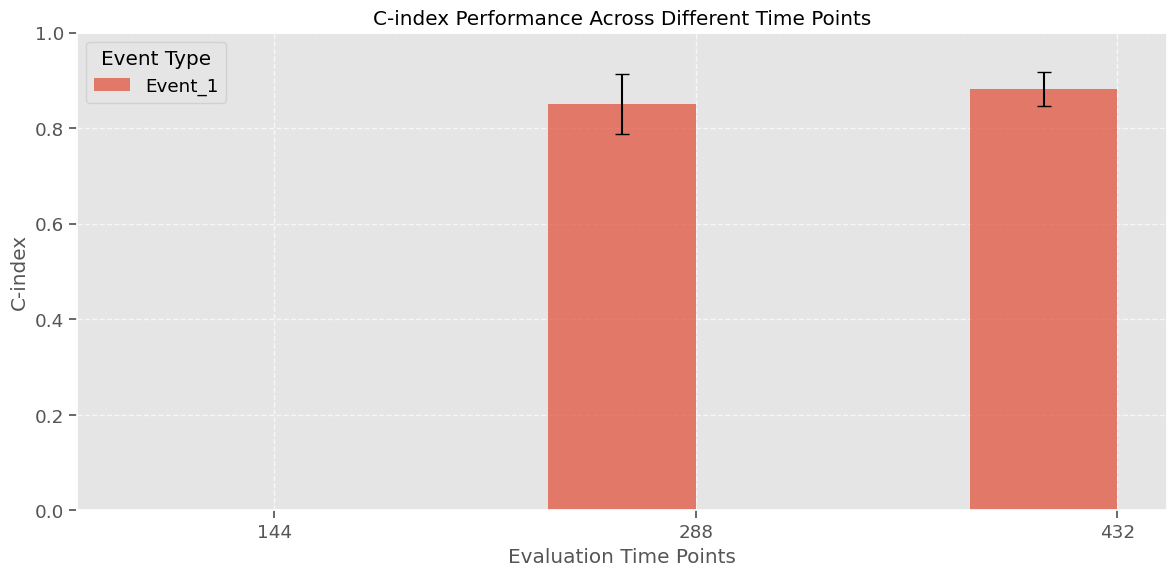

In [47]:
plt.figure(figsize=(12, 6))
x = np.arange(len(cindex_mean.columns))
width = 0.35

for i, event in enumerate(cindex_mean.index):
    plt.bar(x + i*width, cindex_mean.loc[event], width, 
            label=event, yerr=cindex_std.loc[event],
            capsize=5, alpha=0.7)

plt.xlabel('Evaluation Time Points')
plt.ylabel('C-index')
plt.title('C-index Performance Across Different Time Points')
plt.xticks(x + width/2, [col.split('yr')[0] for col in cindex_mean.columns])
plt.legend(title='Event Type')
plt.ylim(0, 1.0)  # C-index typically ranges from 0.5 to 1.0
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

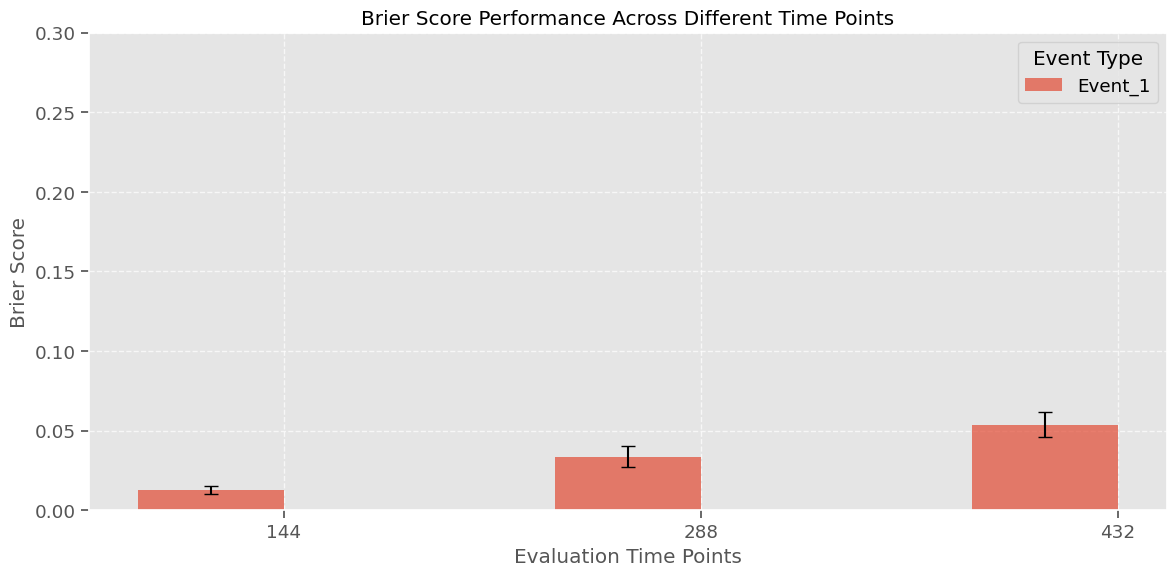

In [48]:
plt.figure(figsize=(12, 6))
x = np.arange(len(brier_mean.columns))
width = 0.35

for i, event in enumerate(brier_mean.index):
    plt.bar(x + i*width, brier_mean.loc[event], width, 
            label=event, yerr=brier_std.loc[event],
            capsize=5, alpha=0.7)

plt.xlabel('Evaluation Time Points')
plt.ylabel('Brier Score')
plt.title('Brier Score Performance Across Different Time Points')
plt.xticks(x + width/2, [col.split('yr')[0] for col in brier_mean.columns])
plt.legend(title='Event Type')
plt.ylim(0, 0.3)  # Brier score typically ranges from 0 to 1, lower is better
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

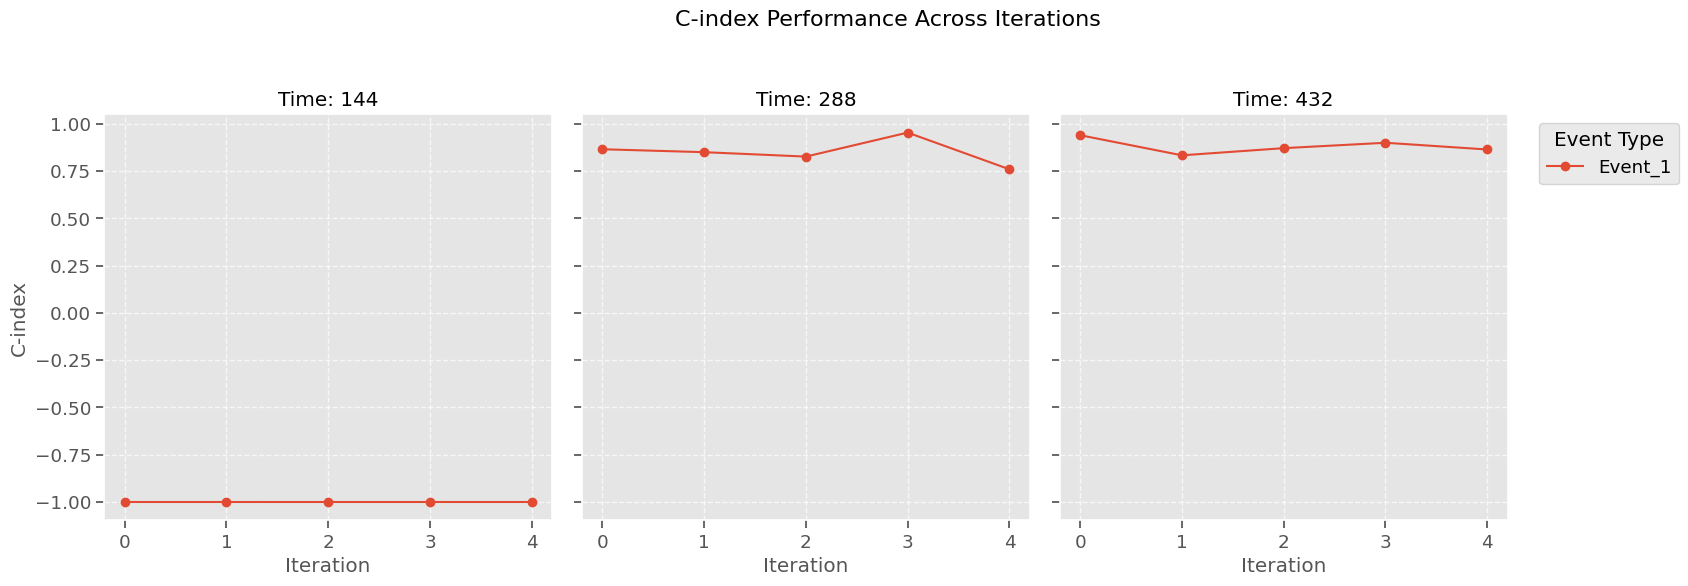

In [49]:
# Compare performance across iterations for C-index
plt.figure(figsize=(14, 7))

iterations = 5  
eval_times = [144, 288, 432]  
events = cindex_mean.index.tolist()

fig, axes = plt.subplots(1, len(eval_times), figsize=(18, 6), sharey=True)

for t, time_point in enumerate(eval_times):
    time_col = f"{time_point}yr c_index"
    
    # Data to plot
    itr_values = []
    for itr in range(iterations):
        df = pd.read_csv(f'METABRIC/results/result_CINDEX_itr{itr}.csv', index_col=0)
        itr_values.append(df[time_col].values)
    
    itr_values = np.array(itr_values).T 
    
    # Plot for each event
    for e, event in enumerate(events):
        axes[t].plot(range(iterations), itr_values[e], 'o-', label=event)
    
    axes[t].set_title(f'Time: {time_point}')
    axes[t].set_xlabel('Iteration')
    if t == 0:
        axes[t].set_ylabel('C-index')
    axes[t].grid(True, linestyle='--', alpha=0.7)
    axes[t].set_xticks(range(iterations))

plt.suptitle('C-index Performance Across Iterations', fontsize=16)
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()

<Figure size 1400x700 with 0 Axes>

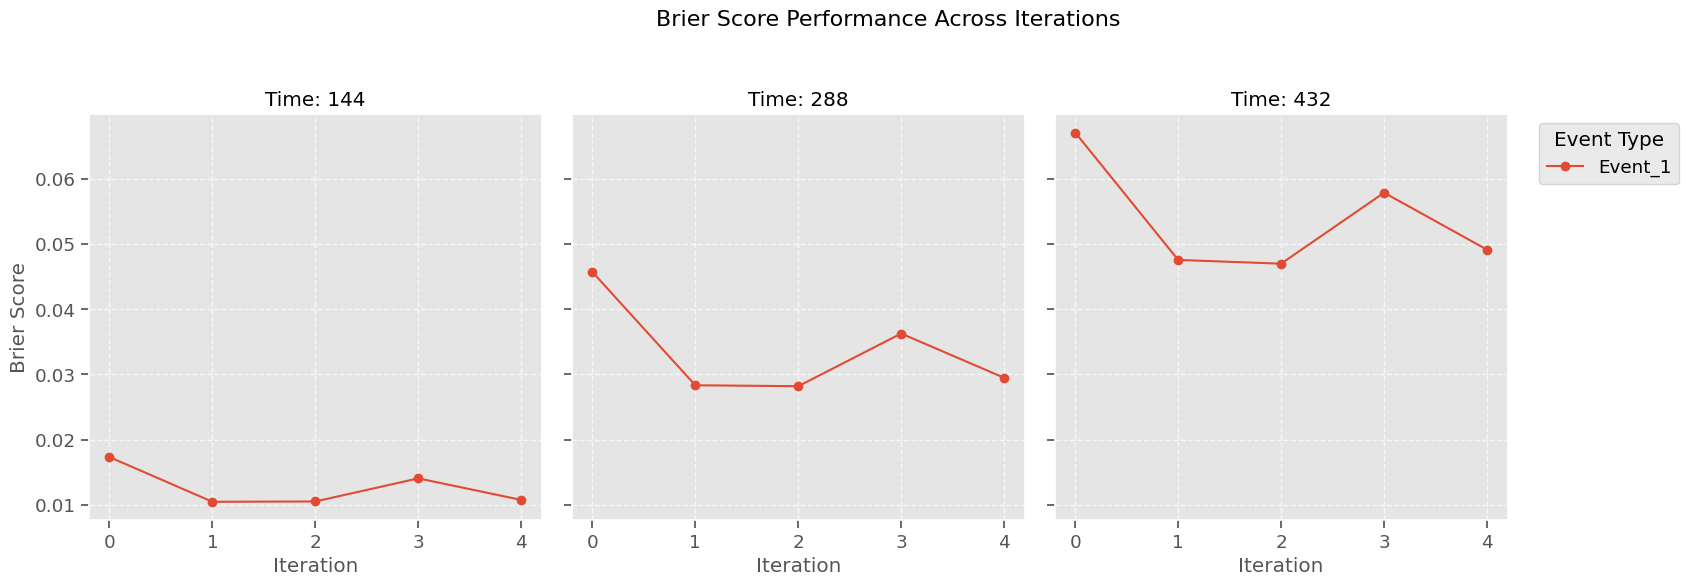

In [14]:
# Compare performance across iterations for Brier score
plt.figure(figsize=(14, 7))

# Create subplots for each evaluation time
fig, axes = plt.subplots(1, len(eval_times), figsize=(18, 6), sharey=True)

for t, time_point in enumerate(eval_times):
    time_col = f"{time_point}yr B_score"
    
    # Data to plot
    itr_values = []
    for itr in range(iterations):
        df = pd.read_csv(f'METABRIC/results/result_BRIER_itr{itr}.csv', index_col=0)
        itr_values.append(df[time_col].values)
    
    itr_values = np.array(itr_values).T  # Shape: [num_events, iterations]
    
    # Plot for each event
    for e, event in enumerate(events):
        axes[t].plot(range(iterations), itr_values[e], 'o-', label=event)
    
    axes[t].set_title(f'Time: {time_point}')
    axes[t].set_xlabel('Iteration')
    if t == 0:
        axes[t].set_ylabel('Brier Score')
    axes[t].grid(True, linestyle='--', alpha=0.7)
    axes[t].set_xticks(range(iterations))

plt.suptitle('Brier Score Performance Across Iterations', fontsize=16)
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.show()

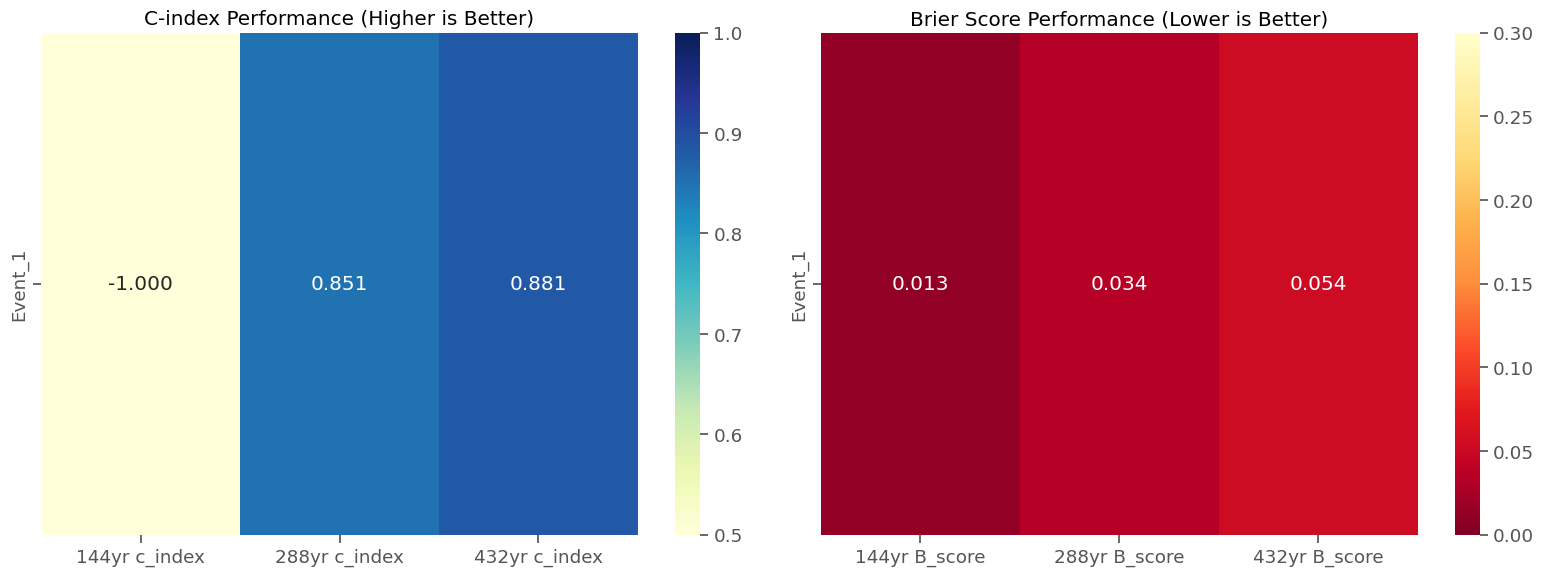

In [15]:
# Create a heatmap to visualize the performance metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# C-index heatmap
sns.heatmap(cindex_mean, annot=True, fmt='.3f', cmap='YlGnBu', ax=ax1, vmin=0.5, vmax=1.0)
ax1.set_title('C-index Performance (Higher is Better)')

# Brier score heatmap
sns.heatmap(brier_mean, annot=True, fmt='.3f', cmap='YlOrRd_r', ax=ax2, vmin=0, vmax=0.3)
ax2.set_title('Brier Score Performance (Lower is Better)')

plt.tight_layout()
plt.show()

In [18]:
# Function to load hyperparameters from log files
def load_hyperparameters(base_path, iterations):
    hyperparams = []
    for itr in range(iterations):
        try:
            hp_path = f'{base_path}/itr_{itr}/hyperparameters_log.txt'
            params = {}
            with open(hp_path, 'r') as f:
                for line in f:
                    if ':' in line:
                        key, value = line.strip().split(':', 1)
                        # Try to convert to appropriate data type
                        try:
                            if value.isdigit():
                                params[key] = int(value)
                            elif value.replace('.', '', 1).isdigit():
                                params[key] = float(value)
                            else:
                                params[key] = value
                        except:
                            params[key] = value
            params['iteration_number'] = itr
            hyperparams.append(params)
        except Exception as e:
            print(f"Error loading hyperparameters for iteration {itr}: {e}")
    
    return pd.DataFrame(hyperparams)


In [19]:
# Load hyperparameters
base_path = 'METABRIC/results'
iterations = 5  # OUT_ITERATION value from the code
hp_df = load_hyperparameters(base_path, iterations)

# Display the hyperparameters
display(hp_df)

# Create a heatmap visualization of the hyperparameters
plt.figure(figsize=(14, 8))
# Select only numeric columns for the heatmap
numeric_cols = hp_df.select_dtypes(include=['number']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'iteration_number']  # Exclude iteration number


,mb_size,iteration,keep_prob,lr_train,h_dim_shared,h_dim_CS,num_layers_shared,num_layers_CS,active_fn,alpha,beta,gamma,out_path,iteration_number
0,128,50000,0.6,0.0001,300,100,2,3,elu,1.0,3.0,0,METABRIC/results/,0
1,128,50000,0.6,0.0001,100,300,1,1,tanh,1.0,3.0,0,METABRIC/results/,1
2,64,50000,0.6,0.0001,50,200,1,2,elu,1.0,1.0,0,METABRIC/results/,2
3,128,50000,0.6,0.0001,300,300,3,3,tanh,1.0,5.0,0,METABRIC/results/,3
4,64,50000,0.6,0.0001,100,50,2,2,tanh,1.0,1.0,0,METABRIC/results/,4


<Figure size 1400x800 with 0 Axes>

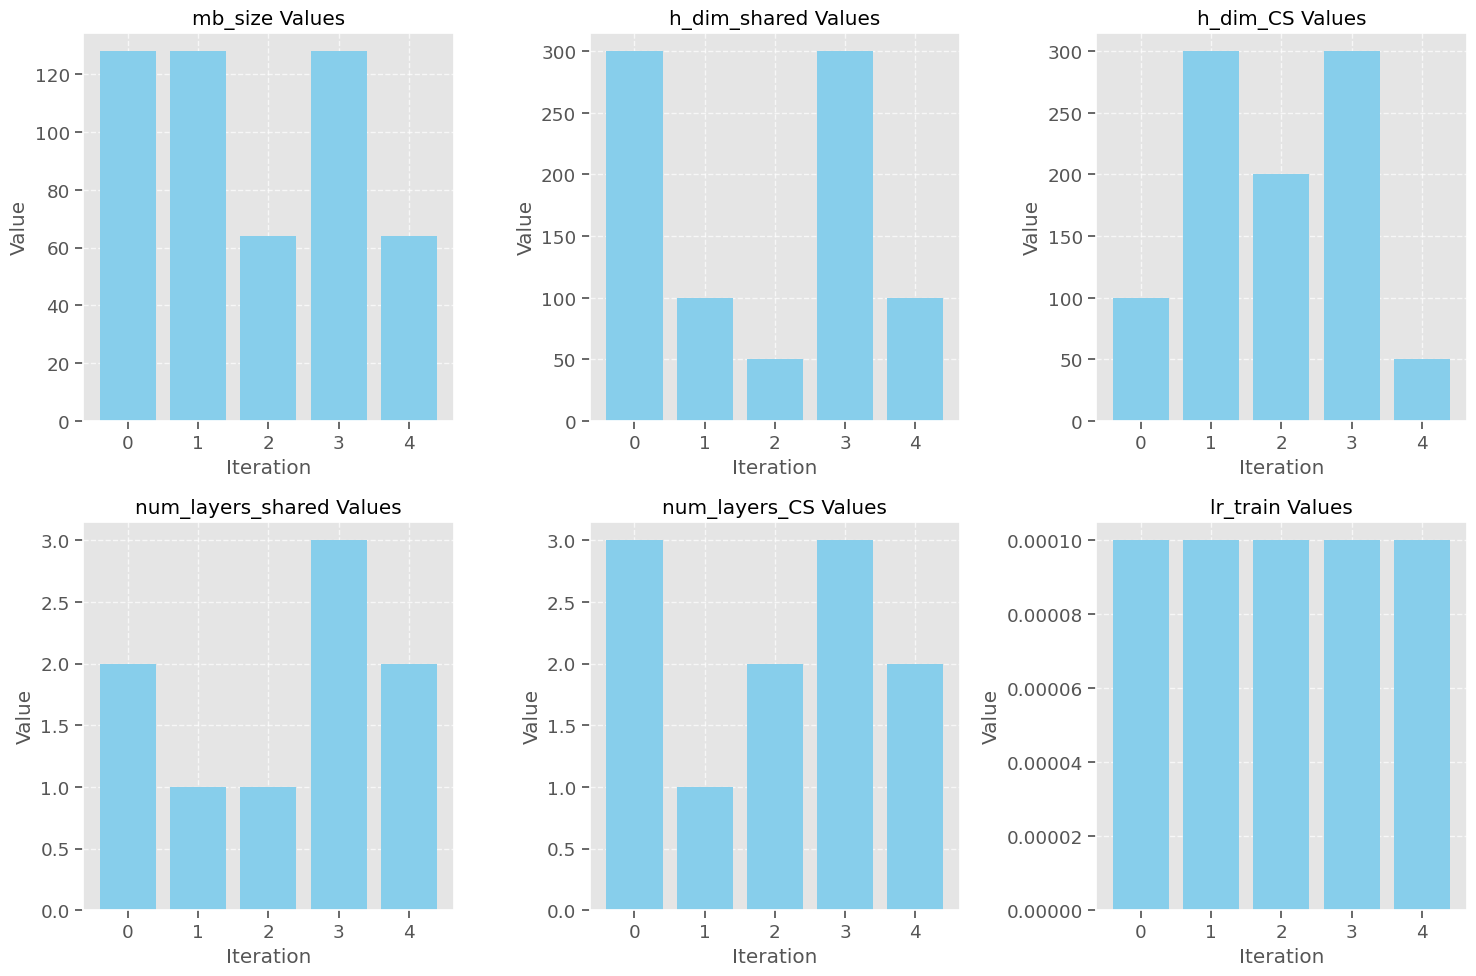

In [ ]:
# First, make sure you have your hyperparameter dataframe loaded
# If you don't have hp_df defined, you need to load or create it

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

key_params = ['mb_size', 'h_dim_shared', 'h_dim_CS', 'num_layers_shared', 'num_layers_CS']
for i, param in enumerate(key_params):
    if param in hp_df.columns:
        axes[i].bar(hp_df['iteration_number'], hp_df[param], color='skyblue')
        axes[i].set_title(f'{param} Values')
        axes[i].set_xlabel('Iteration')
        axes[i].set_ylabel('Value')
        axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

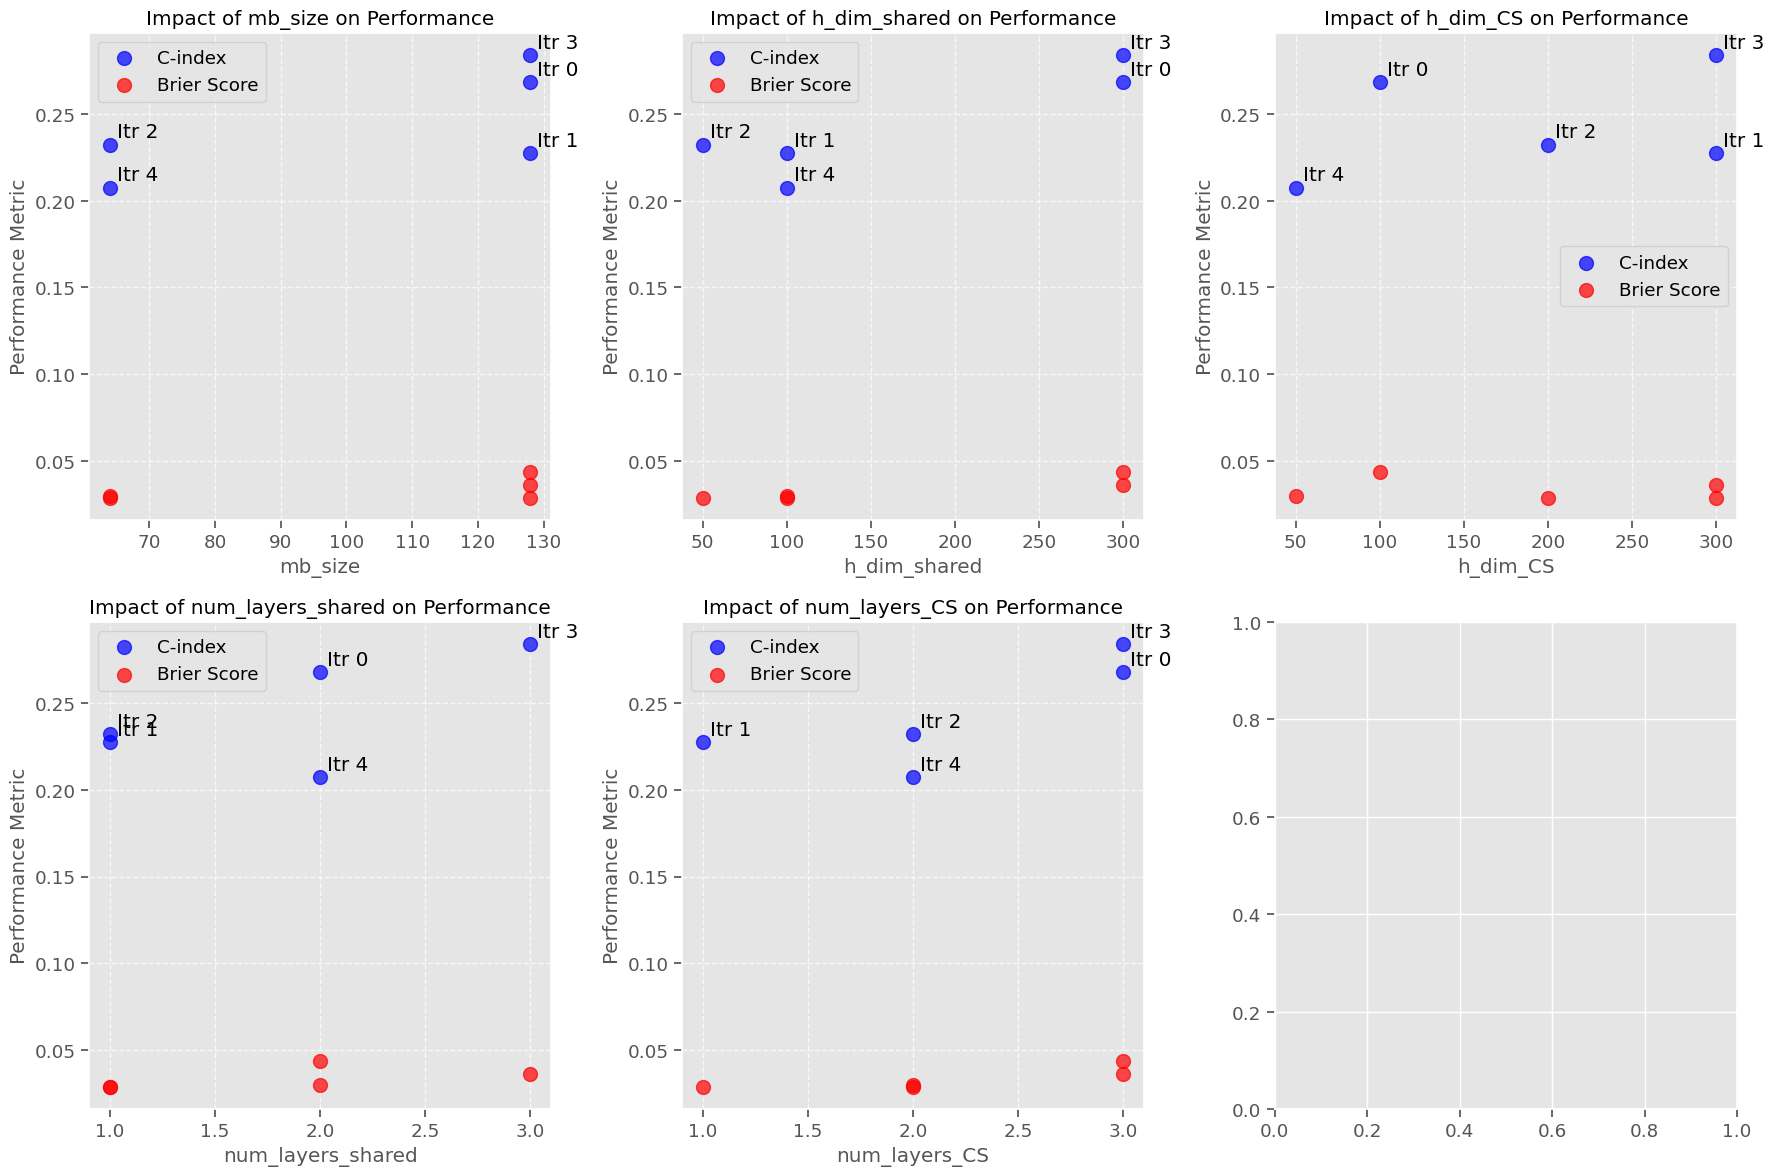

In [ ]:
cindex_mean = pd.read_csv(f'{base_path}/result_CINDEX_FINAL_MEAN.csv', index_col=0)
brier_mean = pd.read_csv(f'{base_path}/result_BRIER_FINAL_MEAN.csv', index_col=0)

# Calculate mean performance metrics for each iteration
iteration_performance = []
for itr in range(iterations):
    cindex_itr = pd.read_csv(f'{base_path}/result_CINDEX_itr{itr}.csv', index_col=0)
    brier_itr = pd.read_csv(f'{base_path}/result_BRIER_itr{itr}.csv', index_col=0)
    
    # Calculate mean across all events and time points
    mean_cindex = cindex_itr.values.mean()
    mean_brier = brier_itr.values.mean()
    
    iteration_performance.append({
        'iteration': itr,
        'mean_cindex': mean_cindex,
        'mean_brier': mean_brier
    })

perf_df = pd.DataFrame(iteration_performance)

# Merge with hyperparameters
combined_df = pd.merge(hp_df, perf_df, left_on='iteration_number', right_on='iteration')

# Plot relationship between hyperparameters and performance
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, param in enumerate(key_params):
    if param in combined_df.columns:
        # Create scatter plot
        axes[i].scatter(combined_df[param], combined_df['mean_cindex'], 
                        label='C-index', color='blue', s=100, alpha=0.7)
        axes[i].scatter(combined_df[param], combined_df['mean_brier'], 
                        label='Brier Score', color='red', s=100, alpha=0.7)
        
        # Add iteration labels
        for j, txt in enumerate(combined_df['iteration_number']):
            axes[i].annotate(f"Itr {txt}", 
                            (combined_df[param].iloc[j], combined_df['mean_cindex'].iloc[j]),
                            xytext=(5, 5), textcoords='offset points')
        
        axes[i].set_title(f'Impact of {param} on Performance')
        axes[i].set_xlabel(param)
        axes[i].set_ylabel('Performance Metric')
        axes[i].legend()
        axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

